In [1]:
cd ../utilities/

/home/gustav/Documents/DD142X/code/utilities


In [2]:
import numpy as np
from spectogram_script import load_all, epochs_as_rows
from plotting import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
freqs, dataDict = load_all()
epoch_idxs = (freqs > 5) & (freqs < 50)
freqs = freqs[epoch_idxs]
epochs = epochs_as_rows(dataDict)[
     : ,
    epoch_idxs
]

epoch_size = 2 ** 11
Fs = 16000.

print(epochs.shape)
print(freqs.shape)
print(freqs)

(367629, 46)
(46,)
[ 5.859375   6.8359375  7.8125     8.7890625  9.765625  10.7421875
 11.71875   12.6953125 13.671875  14.6484375 15.625     16.6015625
 17.578125  18.5546875 19.53125   20.5078125 21.484375  22.4609375
 23.4375    24.4140625 25.390625  26.3671875 27.34375   28.3203125
 29.296875  30.2734375 31.25      32.2265625 33.203125  34.1796875
 35.15625   36.1328125 37.109375  38.0859375 39.0625    40.0390625
 41.015625  41.9921875 42.96875   43.9453125 44.921875  45.8984375
 46.875     47.8515625 48.828125  49.8046875]


In [4]:
n_components = 12
n_features = epochs.shape[1]
pca_model = PCA(n_components = n_components).fit(epochs.copy())

In [5]:
for i in range(0, n_components):
    print(f"Component {i} explains\t{round(100 * pca_model.explained_variance_ratio_[i], 2)}%\tvariance.\
        \tSum = {pca_model.explained_variance_ratio_[ : i + 1].sum()}")

Component 0 explains	52.04%	variance.        	Sum = 0.5204116145128381
Component 1 explains	12.75%	variance.        	Sum = 0.6478677778723477
Component 2 explains	8.15%	variance.        	Sum = 0.7294162404228511
Component 3 explains	6.92%	variance.        	Sum = 0.798584369865047
Component 4 explains	4.62%	variance.        	Sum = 0.8447866239212434
Component 5 explains	3.63%	variance.        	Sum = 0.8810499699163831
Component 6 explains	3.03%	variance.        	Sum = 0.9113658415657191
Component 7 explains	2.29%	variance.        	Sum = 0.93426890840473
Component 8 explains	1.81%	variance.        	Sum = 0.952345302704598
Component 9 explains	1.45%	variance.        	Sum = 0.9668065497742905
Component 10 explains	1.12%	variance.        	Sum = 0.9780187980829996
Component 11 explains	0.9%	variance.        	Sum = 0.9869997522488666


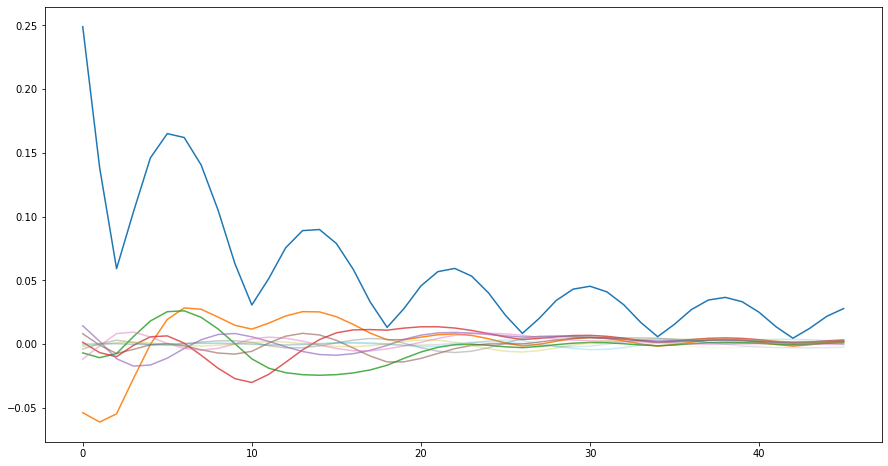

In [6]:
plt.figure(figsize = (15, 8))
for idx, comp in enumerate(pca_model.components_):
    plt.plot(comp * pca_model.explained_variance_ratio_[idx], alpha = 1 - idx/12)
plt.show()

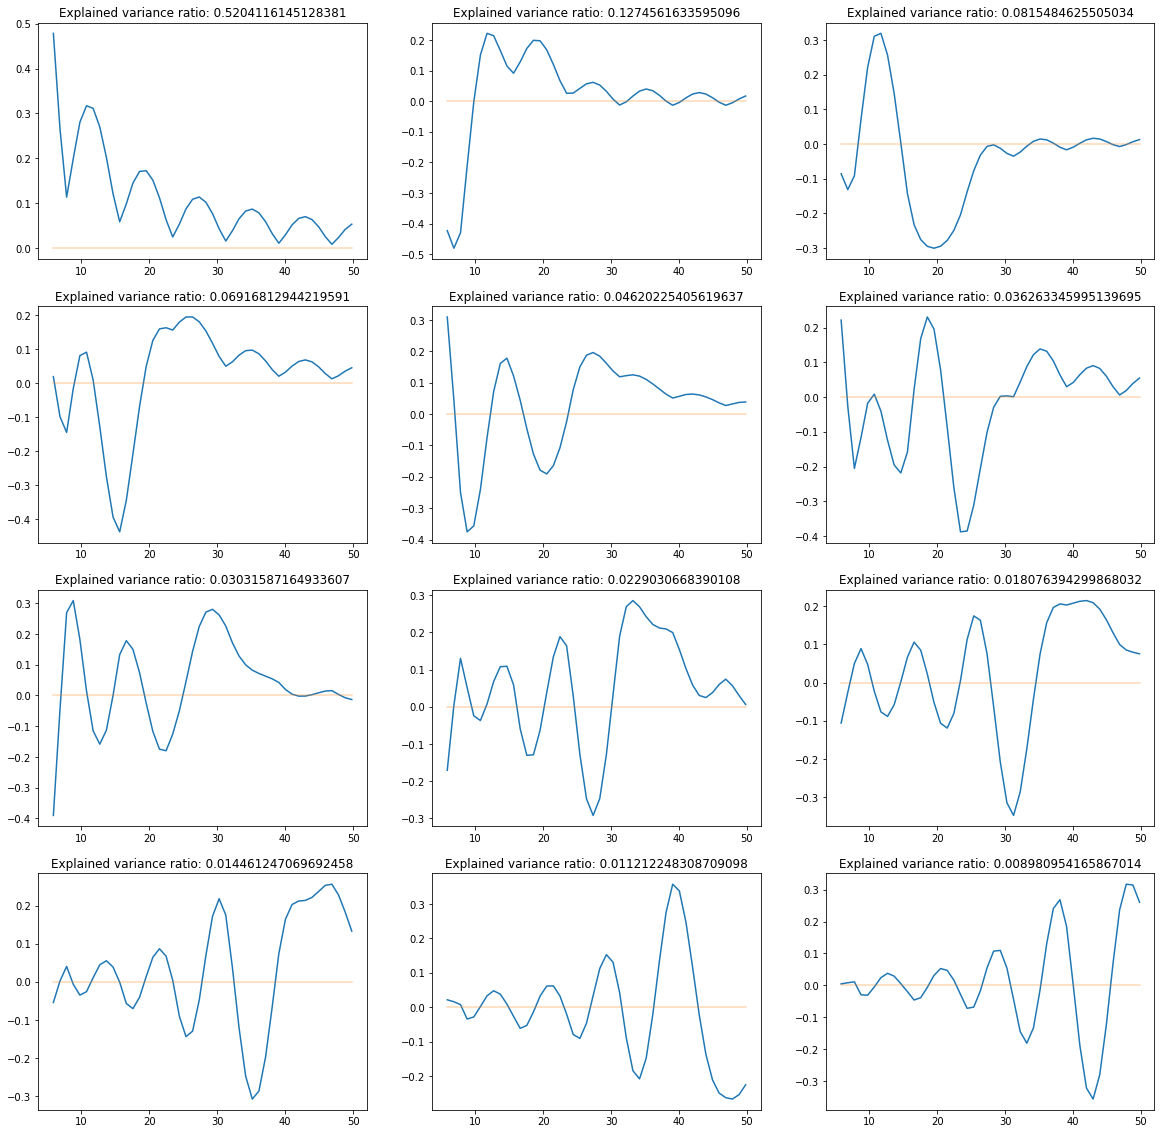

In [7]:
plt.close()
plt.figure(figsize = (20, 20))
for idx, comp in enumerate(pca_model.components_):
    plt.subplot(4, 3, idx + 1)
    plt.title(f"Explained variance ratio: {pca_model.explained_variance_ratio_[idx]}")
    plt.plot(freqs, comp)
    plt.plot([np.min(freqs), np.max(freqs)], [0, 0], alpha = 0.3)
plt.show()

In [25]:
n_animals = len(dataDict.keys())
fig_n = 0
plt.figure(figsize = (7 * n_animals, 7 * n_animals))
for animal1, channels1 in dataDict.items():
    for animal2, channels2 in dataDict.items():
        
        ep1, ep2 = [
            pca_model.transform(
                np.concatenate([
                    v for _, v in channels.items()
                ], axis = 0)[ : , epoch_idxs].copy()
            )[ : , 0 : 2]
            for channels in (channels1, channels2)
        ]
        
        # Fake bounds for simultaneous scaled rastering
        maxx1 = np.max((
            np.max(ep1[:, 0]),
            np.max(ep2[:, 0])
        ))
        minx1 = np.max((
            np.min(ep1[:, 0]),
            np.min(ep2[:, 0])
        ))
        maxx2 = np.max((
            np.max(ep1[:, 1]),
            np.max(ep2[:, 1])
        ))
        minx2 = np.max((
            np.min(ep1[:, 1]),
            np.min(ep2[:, 1])
        ))
        
        p1 = np.array((maxx1, maxx2))
        p2 = np.array((maxx1, minx2))
        p3 = np.array((minx1, maxx2))
        p4 = np.array((minx1, minx2))
        pts = np.array((p1, p2, p3, p4))
        ep1 = np.concatenate((ep1, pts), axis = 0)
        ep2 = np.concatenate((ep2, pts), axis = 0)
        
        side = 60
        red = rasterize(ep1, side)
        blu = rasterize(ep2, side)
        red /= np.max(red)
        blu /= np.max(blu)
        raster = np.zeros((side, side, 3))
        raster[ : , : , 0] = red
        raster[ : , : , 2] = blu
        
        fig_n += 1
        plt.subplot(n_animals, n_animals, fig_n)
        plt.imshow(raster)
        plt.title(f"{animal1} in red - {animal2} in blue\
        \n{round(pca_model.explained_variance_ratio_[0:2].sum(), 2)} explained variance ratio\
        \n{animal1} n: {ep1.shape[0] - 4} - {animal2} n: {ep2.shape[0] - 4}")
        
plt.savefig("../_data/PCA/xref_n.png")
plt.close()

In [26]:
n_animals = len(dataDict.keys())
fig_n = 0
plt.figure(figsize = (7 * n_animals, 7 * n_animals))
for animal1, channels1 in dataDict.items():
    for animal2, channels2 in dataDict.items():
        
        ep1, ep2 = [
            pca_model.transform(
                np.concatenate([
                    v for _, v in channels.items()
                ], axis = 0)[ : , epoch_idxs].copy()
            )[ : , 0 : 2]
            for channels in (channels1, channels2)
        ]
        
        # Fake bounds for simultaneous scaled rastering
        maxx1 = np.max((
            np.max(ep1[:, 0]),
            np.max(ep2[:, 0])
        ))
        minx1 = np.max((
            np.min(ep1[:, 0]),
            np.min(ep2[:, 0])
        ))
        maxx2 = np.max((
            np.max(ep1[:, 1]),
            np.max(ep2[:, 1])
        ))
        minx2 = np.max((
            np.min(ep1[:, 1]),
            np.min(ep2[:, 1])
        ))
        
        p1 = np.array((maxx1, maxx2))
        p2 = np.array((maxx1, minx2))
        p3 = np.array((minx1, maxx2))
        p4 = np.array((minx1, minx2))
        pts = np.array((p1, p2, p3, p4))
        ep1 = np.concatenate((ep1, pts), axis = 0)
        ep2 = np.concatenate((ep2, pts), axis = 0)
        
        side = 60
        red = np.log2(rasterize(ep1, side) + 1)
        blu = np.log2(rasterize(ep2, side) + 1)
        red /= np.max(red)
        blu /= np.max(blu)
        raster = np.zeros((side, side, 3))
        raster[ : , : , 0] = red
        raster[ : , : , 2] = blu
        
        fig_n += 1
        plt.subplot(n_animals, n_animals, fig_n)
        plt.imshow(raster)
        plt.title(f"log2 {animal1} in red - log2 {animal2} in blue\
        \n{round(pca_model.explained_variance_ratio_[0:2].sum(), 2)} explained variance ratio\
        \n{animal1} n: {ep1.shape[0] - 4} - {animal2} n: {ep2.shape[0] - 4}")
        
plt.savefig("../_data/PCA/xreflog2_n.png")
plt.close()